# **QUESTION 3**

# **3.1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, init
import plotly.express as px

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\seth\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\seth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
data_news=pd.read_excel('Question3.xlsx')

In [11]:
data_news.duplicated().sum()

99

In [12]:
data_news.drop_duplicates(inplace=True)

In [13]:
data_news.isnull().sum()

Articles    0
labels      0
dtype: int64

In [14]:
data_news

,Articles,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment
...,...,...
2220,Warning over Windows Word files Writing a Mic...,tech
2221,Fast lifts rise into record books Two high-sp...,tech
2222,Nintendo adds media playing to DS Nintendo is...,tech
2223,Fast moving phone viruses appear Security fir...,tech


In [15]:
import nltk
nltk.download('punkt_tab')
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = " ".join(text.split())
    tokens = word_tokenize(text)

    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]

    cleaned_text = ' '.join(cleaned_tokens)

    return cleaned_text

data_news["articles_cleaned"] = data_news["Articles"].apply(clean)



[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\seth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [16]:
data_news

,Articles,labels,articles_cleaned
0,Musicians to tackle US red tape Musicians gro...,entertainment,musician tackl us red tape musician group tack...
1,"U2s desire to be number one U2, who have won ...",entertainment,desir number one three prestigi grammi award h...
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment,rocker doherti onstag fight rock singer pete d...
3,Snicket tops US box office chart The film ada...,entertainment,snicket top us box offic chart film adapt lemo...
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment,ocean twelv raid box offic ocean twelv crime c...
...,...,...,...
2220,Warning over Windows Word files Writing a Mic...,tech,warn window word file write microsoft word doc...
2221,Fast lifts rise into record books Two high-sp...,tech,fast lift rise record book two highspe lift wo...
2222,Nintendo adds media playing to DS Nintendo is...,tech,nintendo add media play ds nintendo releas ada...
2223,Fast moving phone viruses appear Security fir...,tech,fast move phone virus appear secur firm warn s...


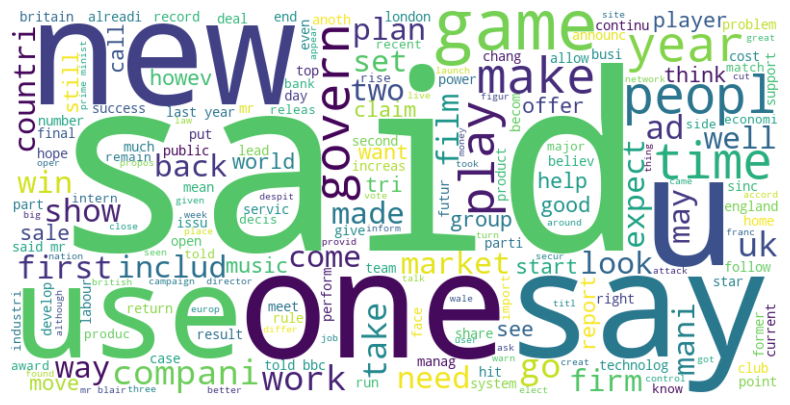

In [18]:
filtered_text = " ".join(data_news["articles_cleaned"].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


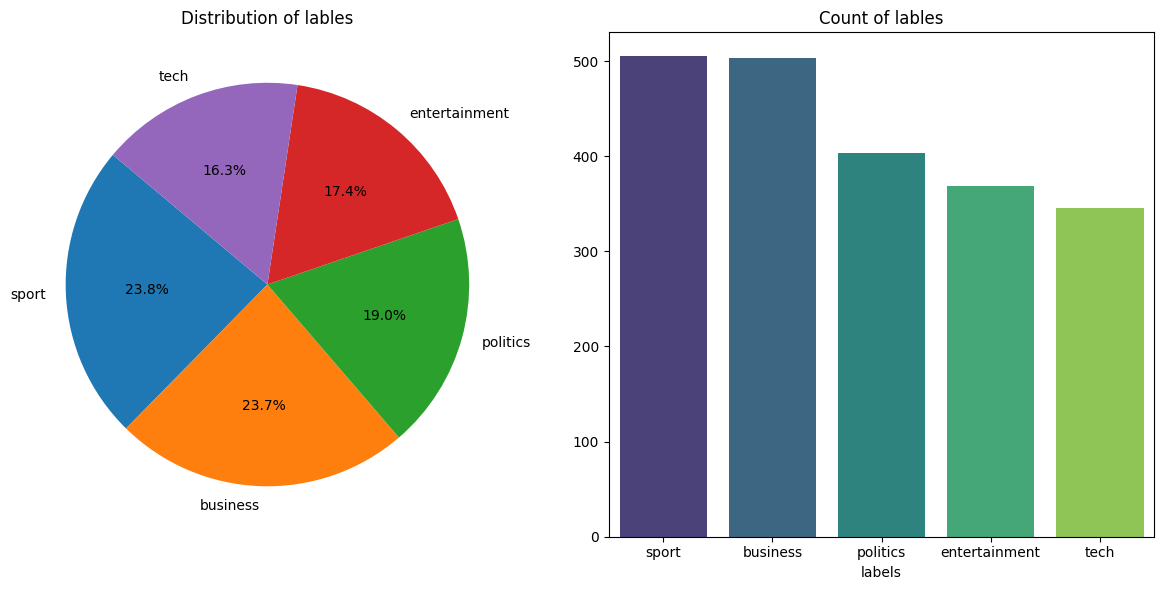

In [19]:
# Value Count Of Labels
count = data_news['labels'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of lables')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of lables')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
# Make Separate Data Set to Visualize text 
# Sport
df_sport = data_news[data_news['labels'] == 'sport']
# Business
df_business = data_news[data_news['labels'] == 'business']
# Politics
df_politics = data_news[data_news['labels'] == 'politics']
# Entertainment
df_entertainment = data_news[data_news['labels'] == 'entertainment']
# Tech
df_tech = data_news[data_news['labels'] == 'tech']


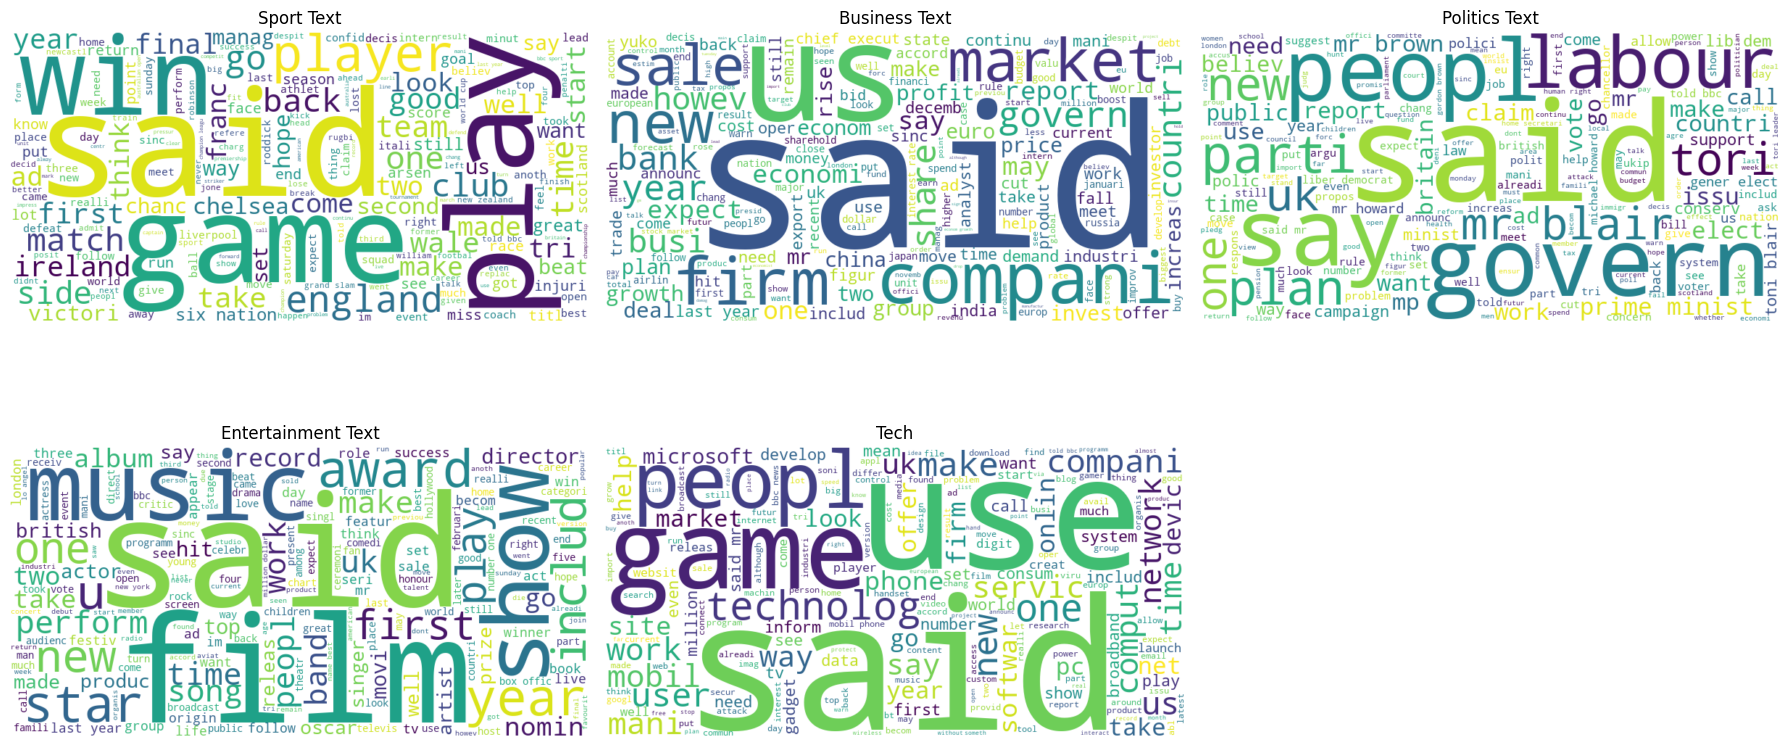

In [22]:
# Combine text from different categories
combined_sport_text = ' '.join(df_sport['articles_cleaned'])
combined_business_text = ' '.join(df_business['articles_cleaned'])
combined_politics_text = ' '.join(df_politics['articles_cleaned'])
combined_entertainment_text = ' '.join(df_entertainment['articles_cleaned'])
combined_tech_text = ' '.join(df_tech['articles_cleaned'])

# Create word clouds
sport_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_sport_text)
business_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_business_text)
politics_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_politics_text)
entertainment_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_entertainment_text)
tech_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_tech_text)

# Plot the word clouds
plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.imshow(sport_wordcloud, interpolation='bilinear')
plt.title('Sport Text')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(business_wordcloud, interpolation='bilinear')
plt.title('Business Text')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(politics_wordcloud, interpolation='bilinear')
plt.title('Politics Text')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(entertainment_wordcloud, interpolation='bilinear')
plt.title('Entertainment Text')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(tech_wordcloud, interpolation='bilinear')
plt.title('Tech')
plt.axis('off')

plt.tight_layout()
plt.show()


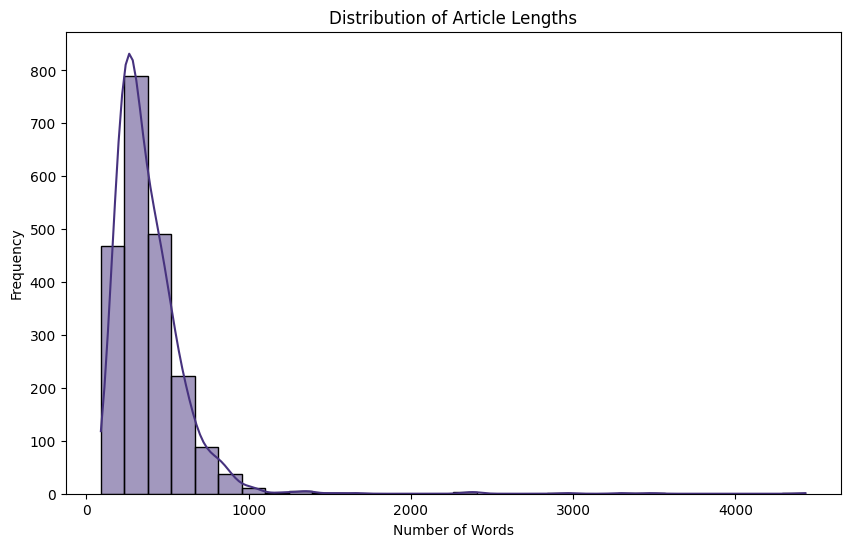

In [23]:
# Distribution of Article Lengths
data_news['article_length'] = data_news['Articles'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(data_news['article_length'], bins=30, kde=True)
plt.title('Distribution of Article Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

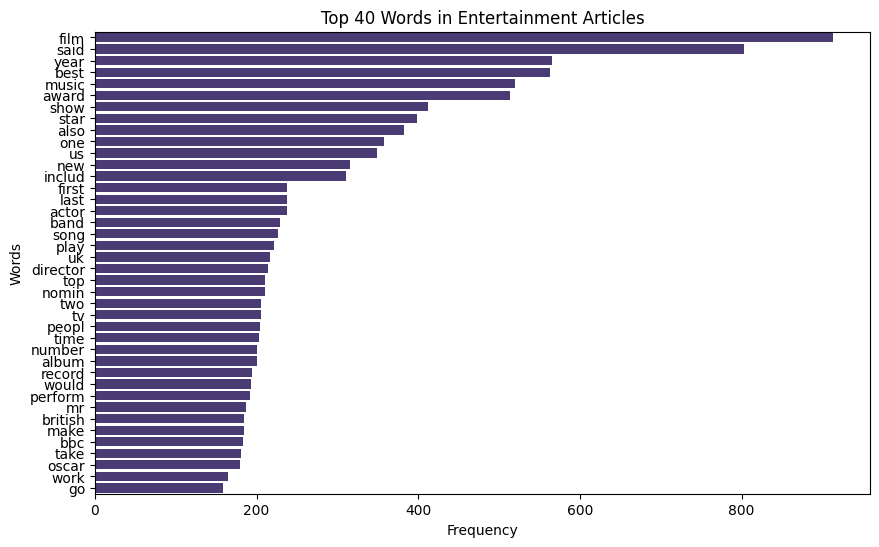

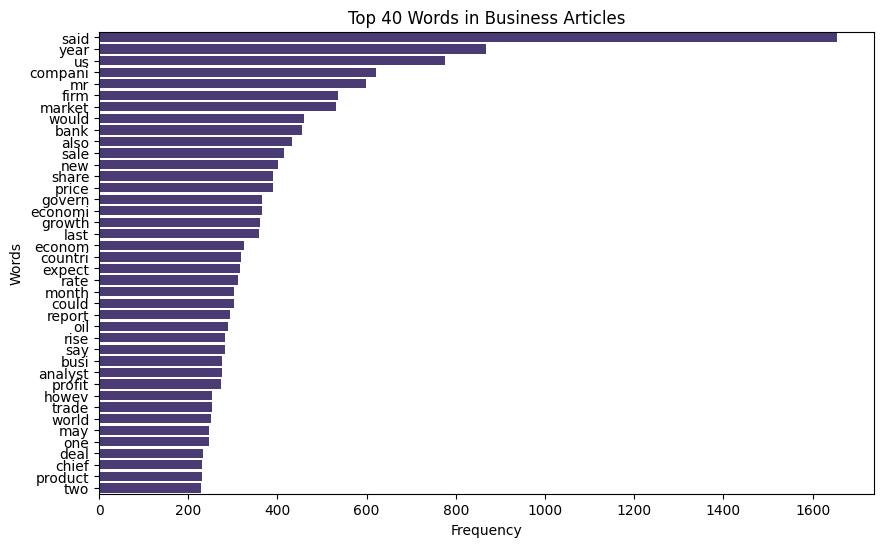

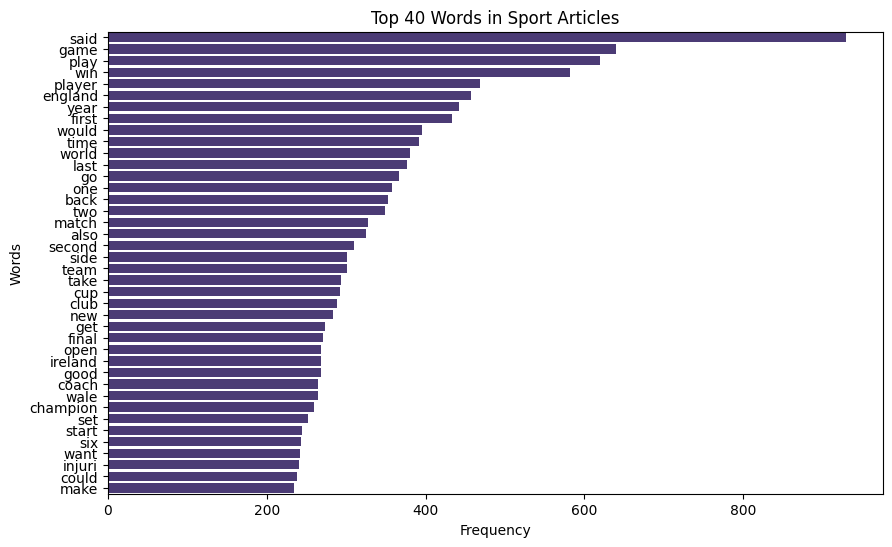

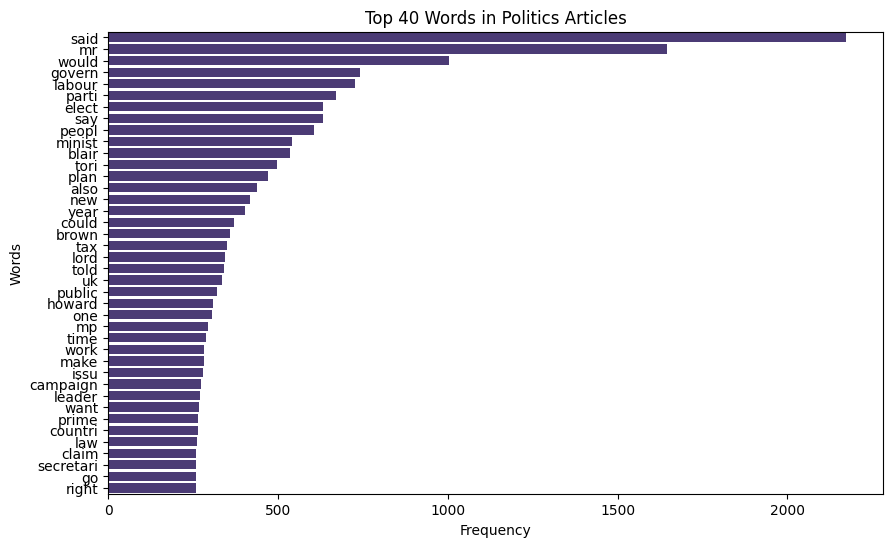

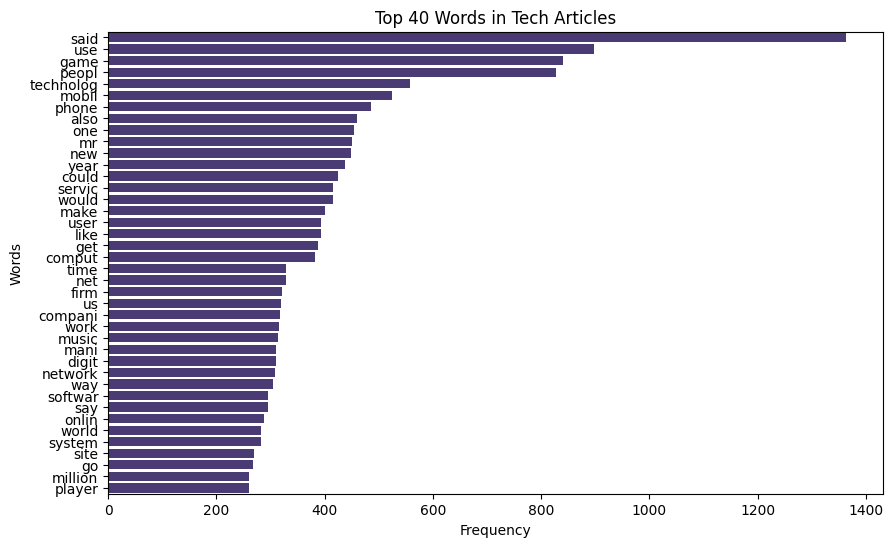

In [26]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Combine text by category
categories = data_news['labels'].unique()
category_texts = {category: ' '.join(data_news[data_news['labels'] == category]['articles_cleaned']) for category in categories}

# Count word frequencies for each category
category_word_counts = {category: Counter(category_texts[category].split()) for category in categories}

# Function to plot top words for a category
def plot_top_words(category, top_n=40):
    top_words = category_word_counts[category].most_common(top_n)
    words, counts = zip(*top_words)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {top_n} Words in {category.capitalize()} Articles')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Plot top words for each category
for category in categories:
    plot_top_words(category)

# **3.2**

Runyakitara is a collective language term combining four realated languages spoken in western Uganda, and that's Runyankore,, Rukiga, Runyoro, and Rutooro. All these four languages originated from Runyoro, and the split came in by missionaries who were using various alphabets to print the Bile in different dialects. 

According to Lewis et al. 215, 13% of Ugandas speak Runyakitara, but the reality is that only a few schools are teaching the languages out of 100 schools reached out to in western Uganda, despite the government policy regarding the teaching of indigenous languages in schools, which was still possible during the colonialism era until 1970. They got excluded from schools up to until 1990 when they were reinstated again. The language users are still led into spelling mistakes despite the fact that the language has existed for more than 150 years, and this has only left the language to be categorized as endangered or threatened, even with the number of speakers that would make it be considered as safe. The language use doesn't expand beyond the home use, like in the official areas. 

The language finding its application in home usage more than official spaces is due to ,among the reasons, the predominance use of foreign languages, people migrating to urban areas where the use of officials language such as Kiswahili and English dominates and also intergerational transmission of the language whereby the native speakers of the language do not necessarily transmit to the next generation due to economic social benefit or social prestige that come with learning other official languages 

Trying to solve these obstacles and extinction concerns provided by the usage and acceptance of Runyakitara, providing language-learning systems appears to be one strategy to help reinvigorate the language for its resuscitation. This entails building computer-assisted language learning (call) systems. 
This has proven to be one of the most successful techniques to aid with language acquisition and immersion at any time and any place for both native and non-native speakers of the language, enabling autonomous learning and feedback to support learners. To develop this system, it will involve the use of natural language processing technologies that will help collect a corpus of Runyakitara speech and writing , also developing a morphological analyzer that involves parsing the internal workings of words in rich languages named "RunyakitaraMorhp," which will be the underlying technology of the whole system. The Runyakitara corpus, which will be used to create spelling and grammar checkers in Runyakitara, will be based on several ranges of sources that are publicly accessible, including newspapers and government documents, student essays and The Bible. 

The creation of natural processing tools for Runyakitara is a big step towards improving the linguistic landscape of the Runyakitara language and many other languages with poor computational linguistic resources. Through the collection of diverse materials, including newspapers, official documents, essays, and The Bible, this initiative underscores the importance of preserving cultural narratives and heritage encapsulated in Runyakitara and many other languages but also paves the way for a future where technology and language coexist. 



### My Recommendations to the Ethnic Leaders of Runyakitara Speakers

   To Invest in the development of computer-assisted language learning (CALL) systems that utilize NLP models. These applications as we ca read, can provide interactive and engaging ways for both native and non-native speakers to learn Runyakitara. This to help in preserving the language by making it more accessible and appealing to younger generations.

   Support the creation of digital resources such as spelling and grammar checkers, text-to-speech systems, and translation tools for Runyakitara. These tools can be integrated into everyday digital platforms, encouraging the use of Runyakitara in various contexts, including education, social media, and official communications. This will help in normalizing the use of the language in both formal and informal settings.

   Ensure that researchers and developers working on NLP models for Runyakitara have access to all necessary resources about thelanguag and the culture , by providing this support, the leaders can facilitate the development of robust NLP tools that aid in language preservation and revitalization.